## ML Lecture 1

In [ ]:
#ONLY INTRODUCTION

## ML Lecture 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
df = pd.read_excel("homeprices.xlsx")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


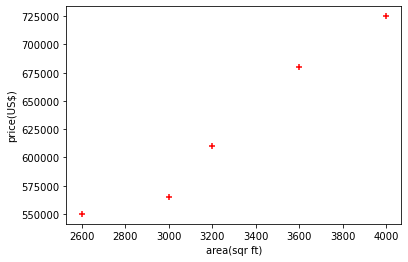

In [17]:
%matplotlib inline

plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')

plt.scatter(df.area,df.price,color = 'red',marker = '+')
plt.show()

In [108]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']].values,df.price)
# reg.predict(3300)

LinearRegression()

In [55]:
reg.predict([[3300]])

array([628715.75342466])

In [50]:
reg.coef_

array([135.78767123])

In [51]:
reg.intercept_

180616.43835616432

In [52]:
# y = m*x + c
# area = coef * price + intercept

135.78767123 *3300 + 180616.43835616432

628715.7534151643

In [107]:
reg.predict([[5000]])

array([2510114.61825809])

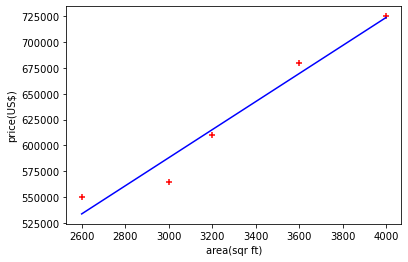

In [74]:
%matplotlib inline

plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')

plt.scatter(df.area,df.price,color = 'red',marker = '+')
plt.plot(df.area,reg.predict(df[['area']].values),color = 'blue')
plt.show()

# Model that generates new file for areas price prediction

In [58]:
d = pd.read_excel("areas.xlsx")
d.head(3)

,area
0,1000
1,1500
2,2300


In [62]:
p = reg.predict(d.values)

In [66]:
d['prices'] = p

In [70]:
d.to_csv("prediction.csv",index = False)

## Exercise for canada year wise per capita income prediction

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [11]:
df2 = pd.read_csv("canada_per_capita_income.csv")
df2 = df2.dropna()
df2

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


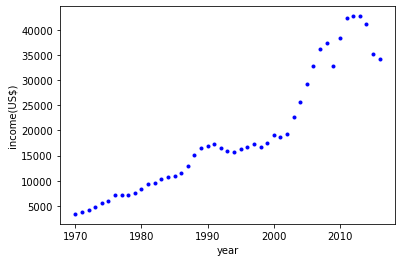

In [12]:
%matplotlib inline

plt.xlabel('year')
plt.ylabel('income(US$)')

plt.scatter(df2.year,df2.income,color = 'blue',marker = '.')
plt.show()

In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['year']].values,df2.income)

LinearRegression()

In [14]:
reg2.predict([[2020]])

array([41288.69409442])

## ML Lecture 3

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
df = pd.read_csv("homeprice.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [20]:
import math
df.bedrooms.median()

4.0

In [4]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [33]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis = 'columns').values,df.price)

LinearRegression()

In [34]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [35]:
reg.intercept_

221323.00186540384

In [36]:
reg.predict([[3000,3,40]])

array([498408.25158031])

In [31]:
reg.predict([[2500,4,5]])

array([578876.03748933])

## Exercise hiring 

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [20]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [8]:
from word2number import w2n
print(w2n.word_to_num('112'))

112


In [14]:
print(w2n.word_to_num('one hundred thirty-five'))

135


In [21]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score,interview_score,salary
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [35]:
import math
median_test_score = math.floor(df['test_score'].mean())
median_test_score

7

In [36]:
df['test_score'] = df['test_score'].fillna(median_test_score)
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [37]:
# reg = linear_model.LinearRegression()
# reg.fit(df.drop('salary',axis = 'columns').values,df.salary)

LinearRegression()

In [43]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score','interview_score']].values,df['salary'])

LinearRegression()

In [44]:
reg.predict([[2,9,6]])

array([53205.96797671])

In [45]:
reg.predict([[12,10,10]])

array([92002.18340611])

## ML Lecture 4

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

In [18]:
        
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

In [22]:
gradient_descent(x,y)

TypeError: must be real number, not str

<Figure size 432x288 with 1 Axes>

hello 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import math

def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

def gradient_descent(x,y):
    m_curr = 0
    b_curr = 0
    iterations = 1000000
    n = len(x)
    learning_rate = 0.0002

    cost_previous = 0

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n)*sum([value**2 for value in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        if math.isclose(cost, cost_previous, rel_tol=1e-20):
            break
        cost_previous = cost
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost, i))

    return m_curr, b_curr

if __name__ == "__main__":
    df = pd.read_csv("test_scores.csv")
    x = np.array(df.math)
    y = np.array(df.cs)

    m, b = gradient_descent(x,y)
    print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

    m_sklearn, b_sklearn = predict_using_sklean()
    print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))


# 